In [11]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
# Target Account
target_users = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

# Variables for holding sentiments
sentiments = []

# Loop through target accounts
for target_user in target_users:
    
    # Counter
    counter = 1
    
    # Variable for max_id
    oldest_tweet = None
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
        
            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Account": target_user,
                               "Text": tweet["text"],
                               "Date": tweet["created_at"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neg,
                               "Neutral": neu,
                               "Tweets Ago": counter})
        
            # Add to counter 
            counter += 1

In [13]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.to_csv("analysis/sentiment_tweets.csv", index=False, header=True)
sentiments_pd.head()

,Account,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
0,@BBC,0.0000,Wed Jul 11 20:39:03 +0000 2018,0.000,1.000,0.000,It’s not coming home. 💔\n\nBut it's been an in...,1
1,@BBC,0.0000,Wed Jul 11 20:23:23 +0000 2018,0.000,1.000,0.000,RT @BBCSport: GOAL\n\nMario Mandzukic drills C...,2
2,@BBC,-0.1027,Wed Jul 11 20:03:46 +0000 2018,0.076,0.924,0.000,RT @BBCSport: Extra-time it is... and we're un...,3
3,@BBC,0.3612,Wed Jul 11 19:52:13 +0000 2018,0.000,0.865,0.135,Full time: #CRO 1-1 #ENG \n\nWho's ready for a...,4
4,@BBC,-0.2960,Wed Jul 11 19:49:56 +0000 2018,0.306,0.694,0.000,RT @BBCBreakfast: No fingernails left... https...,5


In [14]:
# Split the data by account
BBC = sentiments_pd[sentiments_pd["Account"] == "@BBC"]
CBS = sentiments_pd[sentiments_pd["Account"] == "@CBS"]
CNN = sentiments_pd[sentiments_pd["Account"] == "@CNN"]
FOX = sentiments_pd[sentiments_pd["Account"] == "@FoxNews"]
NYT = sentiments_pd[sentiments_pd["Account"] == "@nytimes"]

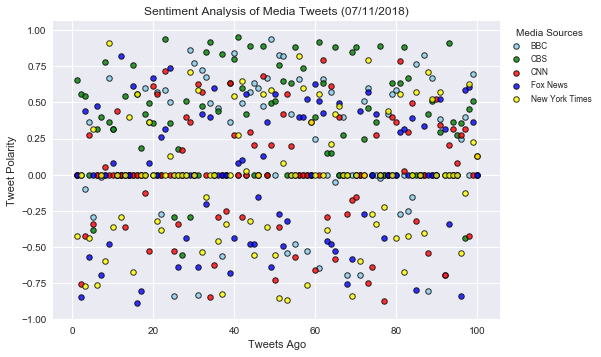

In [15]:
# Build the scatter plots for each account
plt.scatter(BBC["Tweets Ago"], 
            BBC["Compound"], 
            s=30, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="BBC")

plt.scatter(CBS["Tweets Ago"], 
            CBS["Compound"], 
            s=30, c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CBS")

plt.scatter(CNN["Tweets Ago"], 
            CNN["Compound"], 
            s=30, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CNN")

plt.scatter(FOX["Tweets Ago"], 
            FOX["Compound"], 
            s=30, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Fox News")

plt.scatter(NYT["Tweets Ago"], 
            NYT["Compound"], 
            s=30, c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="New York Times")

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)

# Save the figure (and account for the legend being outside the plot when saving)
file_name = str(time.strftime("%m-%d-%y")) + "-Fig1.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show plot
plt.show()

In [16]:
# getting the overall compound score for each account
account_compound_mean = sentiments_pd.groupby(["Account"]).mean()["Compound"]
account_compound_mean

Account
@BBC        0.160747
@CBS        0.346520
@CNN        0.014968
@FoxNews    0.006094
@nytimes   -0.015958
Name: Compound, dtype: float64

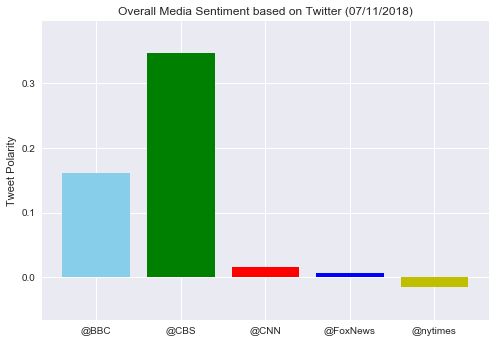

In [17]:
# Bar chart for compound score per account
plt.bar(target_users, account_compound_mean, color=['skyblue','g','r','b','y'], alpha=1, align="center")

# Sets the y limits of the current chart
plt.ylim(min(account_compound_mean)-.05, max(account_compound_mean)+.05)

# Give our chart some labels and a tile
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.ylabel("Tweet Polarity")

# Save Figure
file_name = str(time.strftime("%m-%d-%y")) + "-Fig2.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Print our chart to the screen
plt.show()